In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import nltk
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
import tensorflow as tf

In [2]:
# Passar o Dataset
# df = pd.read_csv("./datasets/updated_file.csv")

df_brancos = pd.read_csv("../datasets/Coleta_Brancas-body_petition.csv")
df_pardas = pd.read_csv("../datasets/Coleta_Pardas-body_petition.csv")
df_negras = pd.read_csv("../datasets/Coleta_Negras-body_petition.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/Coleta_Brancas-body_petition.csv'

In [ ]:
df = pd.concat([df_negras, df_brancos, df_pardas]).reset_index()
df = df.dropna(subset=["Original_Text", "Cor", "Conclusao"])

In [ ]:
df.value_counts()

Name                            Original_Text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           23 non-null     object
 1   Original_Text  23 non-null     object
 2   Label          23 non-null     object
dtypes: object(3)
memory usage: 684.0+ bytes


In [ ]:
y = df["Conclusao"]


## Funções para a classificação de Texto

In [ ]:


def get_str(lst):
    sentence = ''
    for char in lst:
        sentence += char+' '
    sentence = sentence.lower()
    return sentence


def get_word(text): 
    result = nltk.RegexpTokenizer(r'\w+').tokenize(text.lower())
    return result


def stopword_list(stop):
    lst = stopwords.words('english')
    for stopword in stop:
        lst.append(stopword)
    return lst


def remove_stopword(stopwords, lst):    
    stoplist = stopword_list(stopwords)
    txt = ''
    for idx in range(len(lst)):
        txt += lst[idx]
        txt += '\n'
    cleanwordlist = [word for word in txt.split() if word not in stoplist] 
    return cleanwordlist


def lemmatization(words):
    lemm = WordNetLemmatizer()
    tokens = [lemm.lemmatize(word) for word in words]
    return tokens


def Word_Cloud(data, color_background, colormap, title):
    plt.figure(figsize = (15,20))
    wc = WordCloud(width=800, 
               height=400, 
               max_words=50,
               colormap= colormap,
               max_font_size=140,
               random_state=8888, 
               background_color=color_background).generate_from_frequencies(data)
    
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

## Tratar texto


In [ ]:
def textPreprocessor(featureRecord):
    #Remove punctuations
    stemmer = PorterStemmer()
    removePunctuation = [char for char in featureRecord if char not in string.punctuation]
    sentences =''.join(removePunctuation)

    #convert sentences to words
    words = sentences.split(" ")

    #normalize
    wordNormalized=[word.lower() for word in words]

    #remove stropwords
    finalWords=[word for word in wordNormalized if word not in stopwords.words("english")]

    finalWords = [stemmer.stem(word) for word in finalWords]

    #joined = ' '.join(finalWords)

    return finalWords

# textPreprocessor("We need to STOCK UP in anticipation of a possible response or directive related to COVID-19 so we've created a SPECIFIC Amazon Wishlist.\r\r\n.\r\r\nFOOD Items include: black beans, shredded cheese, frozen meats, canned tuna,\x85 https://t.co/NZAoPtKliy")

In [ ]:
#Create Bag Of Words 

#Initialize Count Vectorizer with our custom preprocessing function

wordVector = CountVectorizer(analyzer=textPreprocessor)

#Build Vocab
finalWordVocab = wordVector.fit(df['Original_Text'])

In [ ]:
finalWordVocab.vocabulary_

{'\nexcel': 54,
 'ssimo': 3360,
 'senhor': 3279,
 'doutor': 1461,
 'juiz': 2150,
 'de': 1229,
 'direito': 1407,
 'da': 1211,
 '2a': 276,
 'vara': 3585,
 'c': 851,
 'vel': 3596,
 'comarca': 990,
 'mont': 2395,
 'apraz': 653,
 'sp': 3349,
 '\nauto': 35,
 'n': 2422,
 '': 0,
 '0000000': 90,
 '00': 83,
 '0000': 87,
 '0': 82,
 'execu': 1660,
 'fiscal\nmun': 1775,
 'pio': 2730,
 'j': 2134,
 'devidament': 1374,
 'qualificado': 2946,
 'no': 2479,
 'auto': 764,
 'fiscal': 1774,
 'em': 1515,
 'que': 2956,
 'figura': 1756,
 'como': 999,
 'part': 2644,
 'adversa': 520,
 'adriana': 515,
 'ramo': 2979,
 'servi': 3292,
 'os': 2607,
 'terraplanagem': 3462,
 'vem': 3597,
 'respeitosament': 3142,
 'presen': 2815,
 'vossa': 3670,
 'excel': 1653,
 'ncia': 2436,
 'por': 2761,
 'meio': 2333,
 'seu': 3298,
 'advogado': 527,
 'e': 1479,
 'procurador': 2874,
 'ao': 626,
 'final': 1763,
 'subscrevem': 3374,
 'para': 2635,
 'requer': 3118,
 'conform': 1062,
 'certid': 929,
 'folha': 1786,
 '13': 168,
 'carta': 88

In [ ]:
len(finalWordVocab.vocabulary_)

3688

In [ ]:
#Create Bag Of Words

bagOfWords = finalWordVocab.transform(df['Original_Text'])

bagOfWords

<23x3688 sparse matrix of type '<class 'numpy.int64'>'
	with 8443 stored elements in Compressed Sparse Row format>

# TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf = TfidfVectorizer(stop_words='english', norm='l2' )
X = Tfidf.fit_transform(df["Original_Text"]).toarray()

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

colunas_categoricas = ['Conclusao']

one_hot_enc = make_column_transformer((OneHotEncoder(handle_unknown = 'ignore'),colunas_categoricas),remainder='passthrough')


df = one_hot_enc.fit_transform(df)
df = pd.DataFrame(df, columns=one_hot_enc.get_feature_names_out())
df

,onehotencoder__Label_Aberto,onehotencoder__Label_Fechado,remainder__Name,remainder__Original_Text
0,1.0,0.0,Adriana Ramos,\nExcelent Ssimo Senhor Doutor Juiz De Direito...
1,1.0,0.0,Ailton Da Silva Ferreira,Excelent Ssimo A Senhor A Doutor A Juiz...
2,1.0,0.0,Bruno Pereira Dos Santos,...
3,1.0,0.0,Bruno Ramos,Merit Ssimo Ju Zo Da 1A Vara C Vel Da Comarca...
4,0.0,1.0,Carlos Henrique Da Silva,Exmo Sr Dr Juiz Presidente Do Egr Gio Trib...
5,1.0,0.0,Fabio Ferreira Dias,Excelent Ssimo Senhor Doutor Juiz De Direito ...
6,0.0,1.0,Flavia Medeiros Santos,Exmo Senhor Juiz Da 24A Vara Do Trabalho Do ...
7,1.0,0.0,Flavio Luiz Martins,Ao Ju Zo Da Vara Civel Da Regional De...
8,1.0,0.0,Luiza Rodrigues De Oliveira,Excelent Ssimo Senhor Doutor Juiz De Direito ...
9,1.0,0.0,Luiz Carlos Nogueira,Excelent Ssimo Senhor Doutor Juiz De Direito ...


## Modelo

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

<h2> AVALIAÇÃO DO MODELO </h2>

In [ ]:

#Creating a function to display model results
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

def evaluation_parametrics(name,y_test, y_pred):
    cm_test = confusion_matrix(y_test, y_pred )
    t1 = ConfusionMatrixDisplay(cm_test, display_labels=["Aberto","Fechado", "Ambiguo"])    
    print("Classification Report for Data Test")
    print(classification_report(y_test, y_pred))
    t1.plot()

## Regresão Logistica

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import pickle

log = LogisticRegression(random_state=42)
log.fit(X_train, y_train)
pickle.dump(log, open('pkl/reg_log.pkl', "wb"))



In [ ]:
with open('./pkl/reg_log.pkl', 'rb') as f:
    log = pickle.load(f)

In [ ]:

y_pred = log.predict(X_test)

micro_f1 = f1_score(y_test, y_pred,average='micro')
macro_f1 = f1_score(y_test, y_pred,average='macro')

print("Modelo Logist Regression")
print(f"Macro: {macro_f1} ")
print(f"Micro: {micro_f1}")

Modelo Logist Regression
Macro: 1.0 
Micro: 1.0


Classification Report for Data Test
              precision    recall  f1-score   support

      Aberto       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of labels (2).

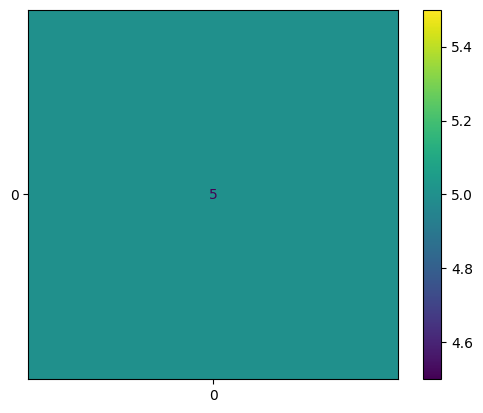

In [ ]:
#Visualizing model results
evaluation_parametrics("Machine Learning - Classification", y_test, y_pred)

# SGD (Stochastic Gradient Descent)

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score

sgd = SGDClassifier(random_state=42,alpha=0.0001)
sgd.fit(X_train, y_train)
pickle.dump(sgd, open('pkl/sgd.pkl', "wb"))

In [ ]:
with open('./pkl/sgd.pkl', 'rb') as f:
    sgd = pickle.load(f)

In [ ]:
y_pred = sgd.predict(X_test)

micro_f1 = f1_score(y_test, y_pred,average='micro')
macro_f1 = f1_score(y_test, y_pred,average='macro')


print("Modelo SGD")
print(f"Macro: {macro_f1} ")
print(f"Micro: {micro_f1}")

Modelo SGD
Macro: 1.0 
Micro: 1.0


Classification Report for Data Test
              precision    recall  f1-score   support

      Aberto       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of labels (2).

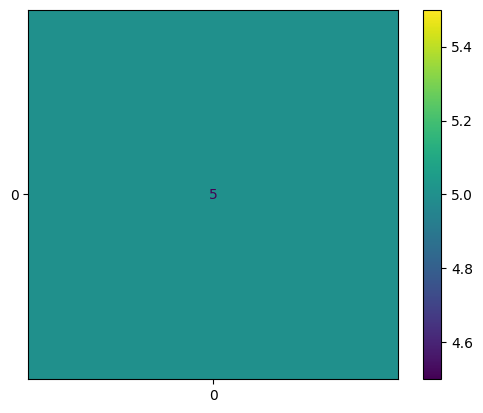

In [ ]:
#Visualizing model results
evaluation_parametrics("Machine Learning - Classification", y_test, y_pred)

## SVM (SUPORT VECTOR MACHINE)

In [ ]:
from sklearn.svm import LinearSVC

lin_clf = LinearSVC(penalty="l2", loss='squared_hinge',tol=0.0001, C=1, multi_class='ovr')

lin_clf.fit(X=X_train, y=y_train)
pickle.dump(log, open('pkl/svm.pkl', "wb"))



c:\Users\alexa\Desktop\OsCrias\crawler-api\.venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [ ]:
with open('./pkl/svm.pkl', 'rb') as f:
    lim_clf = pickle.load(f)

In [ ]:
y_pred = lin_clf.predict(X_test)

micro_f1 = f1_score(y_test, y_pred,average='micro')
macro_f1 = f1_score(y_test, y_pred,average='macro')


print("Modelo SVM")
print(f"Macro: {macro_f1} ")
print(f"Micro: {micro_f1}")

Modelo SVM
Macro: 1.0 
Micro: 1.0


Classification Report for Data Test
              precision    recall  f1-score   support

      Aberto       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of labels (2).

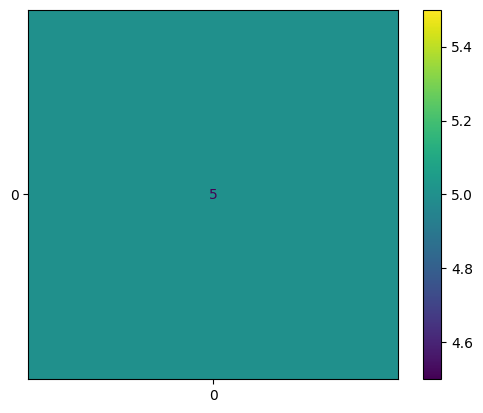

In [ ]:
#Visualizing model results
evaluation_parametrics("Machine Learning - SVM", y_test, y_pred)

# RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, random_state=42)
rfc.fit(X=X_train, y=y_train)
pickle.dump(rfc, open('pkl/random_forest.pkl', "wb"))

In [ ]:
with open('./pkl/random_forest.pkl', 'rb') as f:
    rfc = pickle.load(f)

In [ ]:
y_pred = rfc.predict(X_test)

micro_f1 = f1_score(y_test, y_pred,average='micro')
macro_f1 = f1_score(y_test, y_pred,average='macro')


print("Modelo Random Forest")
print(f"Macro: {macro_f1} ")
print(f"Micro: {micro_f1}")

Modelo Random Forest
Macro: 1.0 
Micro: 1.0


Classification Report for Data Test
              precision    recall  f1-score   support

      Aberto       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of labels (2).

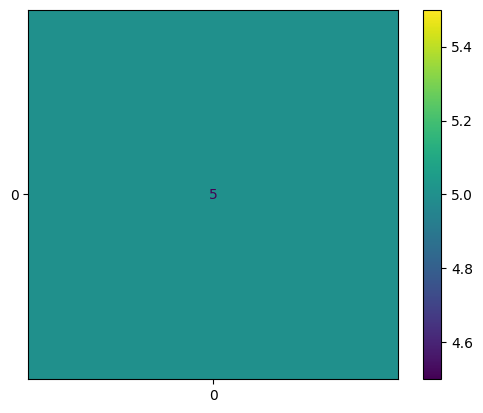

In [ ]:
#Visualizing model results
evaluation_parametrics("Machine Learning - Random Forest", y_test, y_pred)